## Car MPG dataset

The dataset was used in the 1983 American Statistical Association Exposition. The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 2 multivalued discrete and 4 continuous variables. 

In [1]:
#import the needed libraries
import numpy as np   
from sklearn.cluster import KMeans
import pandas as pd    
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
#read the data
cars_df = pd.read_csv("cars-dataset.csv", header = 0)

In [3]:
#check the data
cars_df.head(10)

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0
5,ford galaxie 500,8,429.0,198,4341,10.0,70,15.0
6,chevrolet impala,8,454.0,220,4354,9.0,70,14.0
7,plymouth fury iii,8,440.0,215,4312,8.5,70,14.0
8,pontiac catalina,8,455.0,225,4425,10.0,70,14.0
9,amc ambassador dpl,8,390.0,190,3850,8.5,70,15.0


In [4]:
cars_df.isnull().sum() #check for null values

car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
dtype: int64

In [5]:
cars_df.info() #check for any other information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [6]:
#check for any other wrong value
uniqueValues = cars_df['hp'].unique()

In [7]:
#to check for any missing/invalid values
uniqueValues

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [8]:
#we can see that there are '?' values in the hp column and replace them with nan
#we will do it for whole dataframe to be sure
cars_df = cars_df.replace('?', np.NaN)

In [9]:
cars_df.isnull().sum() #check for null values

car name    0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
mpg         0
dtype: int64

In [10]:
cars_df = cars_df.dropna() #drop the na values

In [11]:
#check unique values in carname
unique_car_names = cars_df['car name'].unique()
print(unique_car_names)

['chevrolet chevelle malibu' 'buick skylark 320' 'plymouth satellite'
 'amc rebel sst' 'ford torino' 'ford galaxie 500' 'chevrolet impala'
 'plymouth fury iii' 'pontiac catalina' 'amc ambassador dpl'
 'dodge challenger se' "plymouth 'cuda 340" 'chevrolet monte carlo'
 'buick estate wagon (sw)' 'toyota corona mark ii' 'plymouth duster'
 'amc hornet' 'ford maverick' 'datsun pl510'
 'volkswagen 1131 deluxe sedan' 'peugeot 504' 'audi 100 ls' 'saab 99e'
 'bmw 2002' 'amc gremlin' 'ford f250' 'chevy c20' 'dodge d200' 'hi 1200d'
 'chevrolet vega 2300' 'toyota corona' 'plymouth satellite custom'
 'ford torino 500' 'amc matador' 'pontiac catalina brougham'
 'dodge monaco (sw)' 'ford country squire (sw)' 'pontiac safari (sw)'
 'amc hornet sportabout (sw)' 'chevrolet vega (sw)' 'pontiac firebird'
 'ford mustang' 'mercury capri 2000' 'opel 1900' 'peugeot 304' 'fiat 124b'
 'toyota corolla 1200' 'datsun 1200' 'volkswagen model 111'
 'plymouth cricket' 'toyota corona hardtop' 'dodge colt hardtop'
 'vo

The cylinder Column contains below values
 4    199
8    103
6     83
3      4
5      3
Name: cyl, dtype: int64


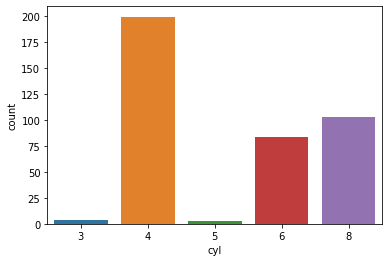

In [12]:
#plot the categorical variable
print("The cylinder Column contains below values\n", cars_df["cyl"].value_counts())
ax = sns.countplot(x="cyl", data=cars_df)

The year Column contains below values
 73    40
78    36
76    34
82    30
75    30
79    29
70    29
81    28
77    28
72    28
80    27
71    27
74    26
Name: yr, dtype: int64


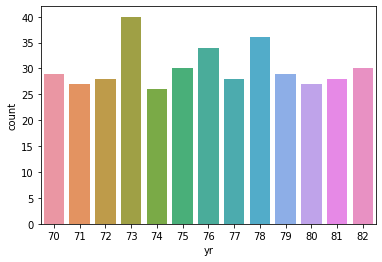

In [13]:
#plot the categorical variable
print("The year Column contains below values\n", cars_df["yr"].value_counts())
ax = sns.countplot(x="yr", data=cars_df)

In [14]:
#convert object variable to int variable
cars_df['hp'] = cars_df['hp'].astype(int)

In [15]:
cars_df.info() #check for any other information

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
car name    392 non-null object
cyl         392 non-null int64
disp        392 non-null float64
hp          392 non-null int32
wt          392 non-null int64
acc         392 non-null float64
yr          392 non-null int64
mpg         392 non-null float64
dtypes: float64(3), int32(1), int64(3), object(1)
memory usage: 36.0+ KB


In [16]:
#statistical inference for each column of the dataframe
cars_df.describe()

,cyl,disp,hp,wt,acc,yr,mpg
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,23.445918
std,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,7.805007
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,17.000000
50%,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,22.750000
75%,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,46.600000


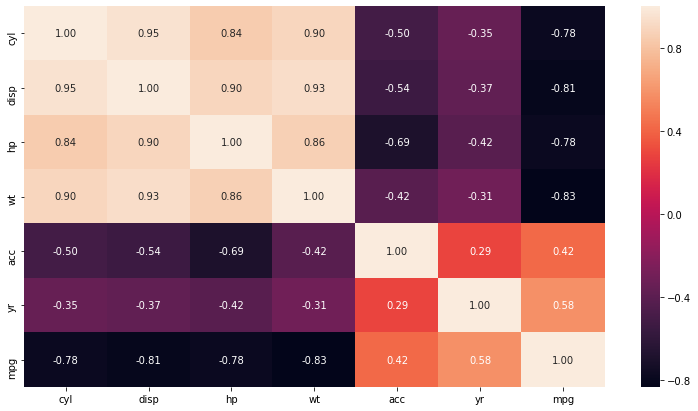

In [17]:
#Plot the correlation Matrix
corr_matrix = cars_df.corr()
plt.figure(figsize=(13,7))
sns.heatmap(corr_matrix, annot=True, fmt='.2f')

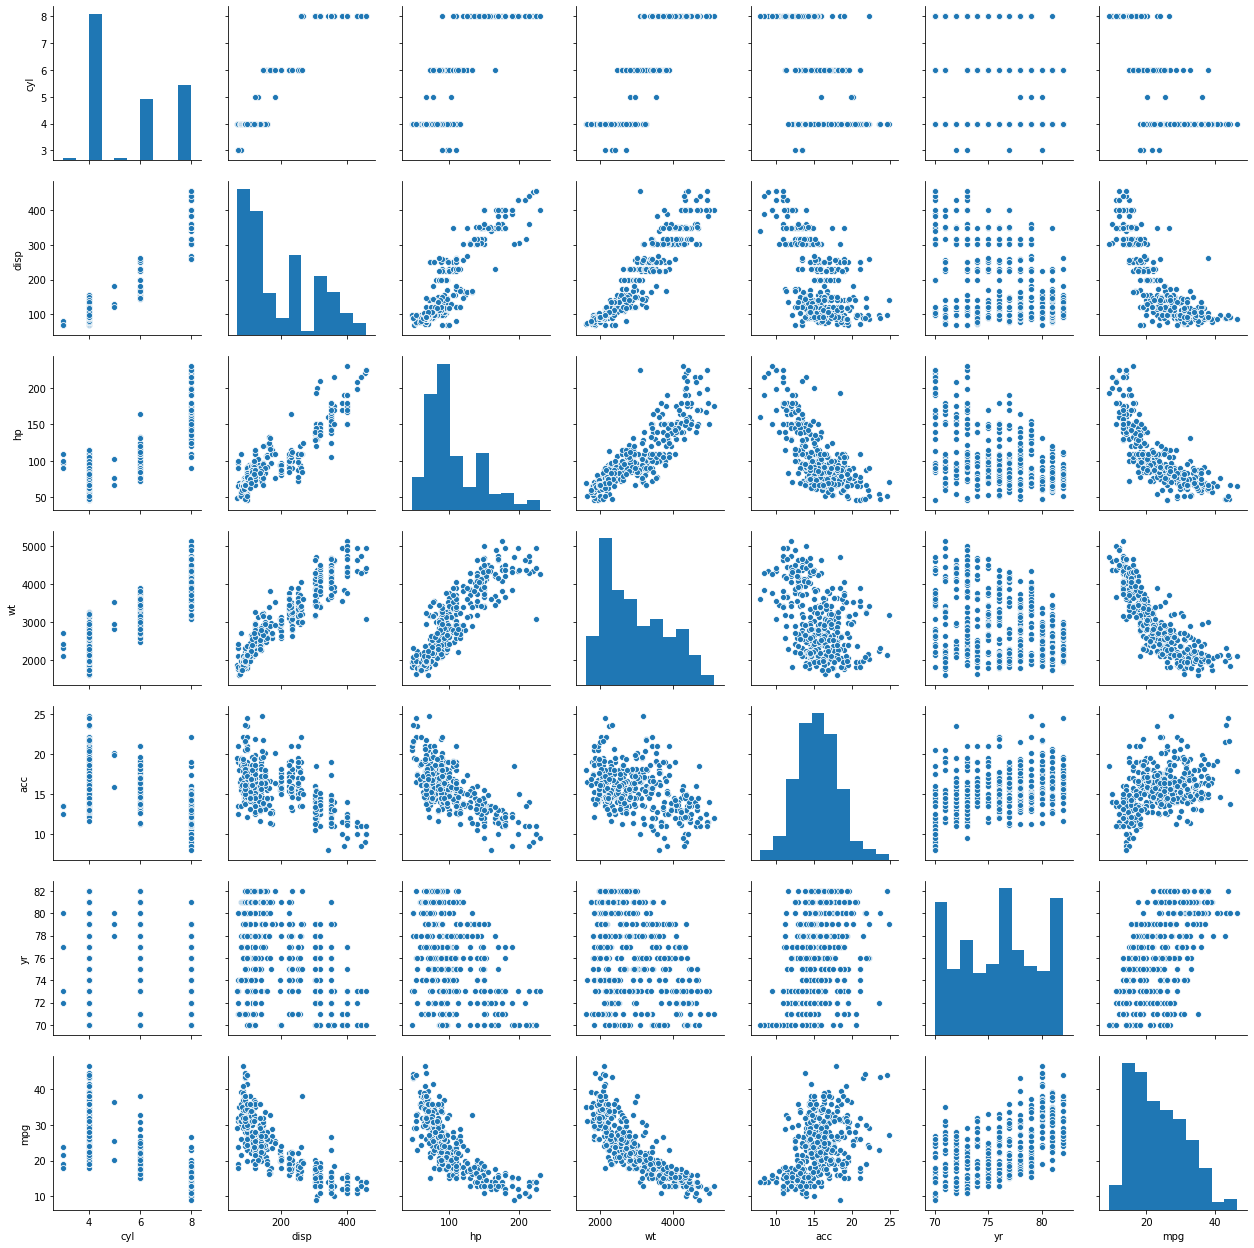

In [18]:
#pairplot to infer from data
sns.pairplot(cars_df)

### From the above heatmap, we can observe that cylinders, displacement, horsepower and weight are strongly and negatively correlated with mpg. AND acceleration, year are weakly and positively correlated with mpg.

In [19]:
#Remove the Non Numeric Variable
cars_df = cars_df.drop(['car name'],axis=1)

### K-Means Clustering

In [20]:
cars_df_z = cars_df.apply(zscore) #apply the zscore to standardize

In [21]:
#asssign a range variable
k_range = range(1,10)
cluster_errors = []

In [22]:
#iterate over the range to find optimal number of custer
for num in k_range:
    clusters = KMeans(num, n_init = 10)
    clusters.fit(cars_df_z)
    labels = clusters.labels_    # capture the cluster lables
    centroids = clusters.cluster_centers_  # capture the centroids
    cluster_errors.append(clusters.inertia_)    # capture the intertia

# combine the cluster_range and cluster_errors into a dataframe
clusters_df = pd.DataFrame({"num_clusters":k_range, "cluster_errors":cluster_errors})
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,2744.000000
1,2,1272.900760
2,3,928.617487
3,4,725.327184
4,5,654.641339
5,6,585.027353
6,7,541.911669
7,8,489.468115
8,9,447.967182


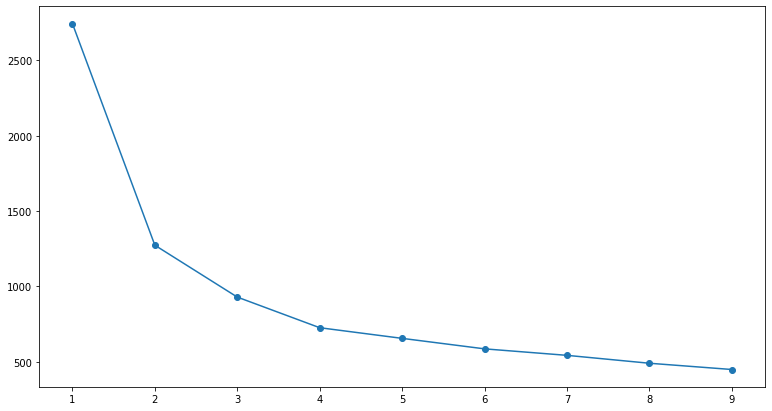

In [23]:
# Elbow plot
plt.figure(figsize=(13,7))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [24]:
#Recreate the model at cluster = 4
cluster = KMeans(n_clusters =4, n_init= 10)
cluster.fit(cars_df_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [25]:
centroids = cluster.cluster_centers_ #collect the centroids

In [26]:
# store centroid values into a dataframe under respective columns
centroid_df = pd.DataFrame(centroids, columns=list(cars_df))

In [27]:
labels = cluster.labels_ #collect the labels

In [28]:
#append Labels to the main dataframe
cars_df['cluster']=labels

In [29]:
# creating a new dataframe only for labels and converting it into categorical variable
cars_df['cluster'] = cars_df['cluster'].astype('category')

In [30]:
#count the variables in each cluster
cars_df['cluster'].value_counts()

3    109
0    100
2     94
1     89
Name: cluster, dtype: int64

In [31]:
#segregate the dataframe depending upon their clusters
cars_clusters = cars_df.groupby(['cluster'])
df0=cars_clusters.get_group(0)
df1=cars_clusters.get_group(1)
df2=cars_clusters.get_group(2)
df3=cars_clusters.get_group(3)

In [32]:
#check each cluster dataframe shapes
df0.shape,df1.shape,df2.shape,df3.shape

((100, 8), (89, 8), (94, 8), (109, 8))

In [33]:
#display some data
df0.head()

,cyl,disp,hp,wt,acc,yr,mpg,cluster
14,4,113.0,95,2372,15.0,70,24.0,0
17,6,200.0,85,2587,16.0,70,21.0,0
18,4,97.0,88,2130,14.5,70,27.0,0
19,4,97.0,46,1835,20.5,70,26.0,0
20,4,110.0,87,2672,17.5,70,25.0,0


### Linear Regression for esch formed clusters

In [34]:
#split the data in dependent and target variable for first cluster
X = df0.drop(['mpg','cluster'],axis = 1)
y = df0['mpg']

In [35]:
#Standardize the dependent variable
X = StandardScaler().fit_transform(X)

In [36]:
#split into train and test dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.33,random_state=324)

In [37]:
#apply Linear Regression
regressor = LinearRegression()

In [38]:
#fit the regressor for first cluster
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
#find the coefficients of first cluster
coeff_df1 = pd.DataFrame(regressor.coef_, ['cyl','disp','hp','wt','acc','yr'], columns=['Coefficient'])
coeff_df1

,Coefficient
cyl,1.055642
disp,-1.226637
hp,-0.092182
wt,-1.935924
acc,-0.156876
yr,0.750673


In [40]:
#split the data in dependent and target variable for second cluster
X1 = df1.drop(['mpg','cluster'],axis = 1)
y1 = df1['mpg']

In [41]:
#Standardize the dependent variable
X1 = StandardScaler().fit_transform(X1)

In [42]:
#split into train and test dataset
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size = 0.33,random_state=324)

In [43]:
#fit the regressor for second cluster
regressor.fit(X1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
#find the coefficients of second cluster
coeff_df2 = pd.DataFrame(regressor.coef_, ['cyl','disp','hp','wt','acc','yr'], columns=['Coefficient'])
coeff_df2

,Coefficient
cyl,0.523653
disp,-0.179294
hp,-0.156084
wt,-1.332752
acc,-0.383637
yr,1.401843


In [45]:
#split the data in dependent and target variable for third cluster
X2 = df2.drop(['mpg','cluster'],axis = 1)
y2 = df2['mpg']

In [46]:
#Standardize the dependent variable
X2 = StandardScaler().fit_transform(X2)

In [47]:
#split into train and test dataset
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size = 0.33,random_state=324)

In [48]:
#fit the regressor for third cluster
regressor.fit(X2_train,y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
#find the coefficients of third cluster
coeff_df3 = pd.DataFrame(regressor.coef_, ['cyl','disp','hp','wt','acc','yr'], columns=['Coefficient'])
coeff_df3

,Coefficient
cyl,0.000000
disp,-0.335181
hp,-0.544902
wt,-0.297100
acc,-1.147282
yr,1.108032


In [50]:
#split the data in dependent and target variable for fourth cluster
X3 = df3.drop(['mpg','cluster'],axis = 1)
y3 = df3['mpg']

In [51]:
#Standardize the dependent variable
X3 = StandardScaler().fit_transform(X3)

In [52]:
#split into train and test dataset
X3_train,X3_test,y3_train,y3_test=train_test_split(X3,y3,test_size = 0.33,random_state=324)

In [53]:
#fit the regressor for fourth cluster
regressor.fit(X3_train,y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
#find the coefficients of fourth cluster
coeff_df4 = pd.DataFrame(regressor.coef_, ['cyl','disp','hp','wt','acc','yr'], columns=['Coefficient'])
coeff_df4

,Coefficient
cyl,2.587012
disp,-1.586594
hp,-1.430897
wt,-1.567466
acc,0.347015
yr,1.258205
